<a href="https://colab.research.google.com/github/JohannPalheiros/gutendex-analytics/blob/main/gutendex_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%% Importações e constantes
import requests as req
import numpy as np
import pandas as pd
import matplotlib as plt
import json as js
import math

CONST_DECODE_UTF8 = 'utf-8'
CONST_GUTENDEX_BOOKS_URL = 'https://gutendex.com/books/'
CONST_GUTENDEX_PAGE_PARAM = '?page='

CONST_PERCENT_TO_USE = 0.01
CONST_COUNT_STR = 'count'
CONST_RESULTS_STR = 'results'
CONST_PERCENT_USED_TO_SHOW = CONST_PERCENT_TO_USE * 100

In [ ]:
#%% Requisição para verificar quantidade de livros disponiveis
booksDataBytes = req.get(CONST_GUTENDEX_BOOKS_URL).content
allBooksReqData = js.loads(booksDataBytes.decode(CONST_DECODE_UTF8))
allBooksCount = allBooksReqData[CONST_COUNT_STR]
totalItensPerPage = len(allBooksReqData[CONST_RESULTS_STR])

print('Total de todos os livros existentes no gutendex:', allBooksCount)
print('Total de livros por pagina:', totalItensPerPage)

Total de todos os livros existentes no gutendex: 72017
Total de livros por pagina: 32


In [ ]:
#%% Pegando apenas amostra de 1% do total de livros
onePercentOfAllBooks = round(allBooksCount * CONST_PERCENT_TO_USE)
totalRequests = math.ceil(onePercentOfAllBooks / totalItensPerPage)

print('Total de', int(CONST_PERCENT_USED_TO_SHOW), '% dos livros:', onePercentOfAllBooks)
print('Total de requisições necessarias:', totalRequests)

Total de 1 % dos livros: 720
Total de requisições necessarias: 23


In [ ]:
#%% Iniciando requisições para carga de dados
booksListData = []

for index in range(1, totalRequests+1):
  urlToReq = CONST_GUTENDEX_BOOKS_URL + CONST_GUTENDEX_PAGE_PARAM + str(index)
  dataFromReq = req.get(urlToReq).content
  dataDecoded = js.loads(dataFromReq.decode(CONST_DECODE_UTF8))
  booksListData = booksListData + dataDecoded[CONST_RESULTS_STR]

print('Total de livros retornados que serão usados:', len(booksListData))

Total de livros retornados que serão usados: 736


In [ ]:
#%% Bloco para exibir dataframe
booksDataDf = pd.DataFrame(booksListData)

booksDataDf.head()

,id,title,authors,translators,subjects,bookshelves,languages,copyright,media_type,formats,download_count
0,84,"Frankenstein; Or, The Modern Prometheus","[{'name': 'Shelley, Mary Wollstonecraft', 'bir...",[],[Frankenstein's monster (Fictitious character)...,"[Gothic Fiction, Movie Books, Precursors of Sc...",[en],False,Text,{'text/plain': 'https://www.gutenberg.org/eboo...,84070
1,1513,Romeo and Juliet,"[{'name': 'Shakespeare, William', 'birth_year'...",[],"[Conflict of generations -- Drama, Juliet (Fic...",[],[en],False,Text,{'application/x-mobipocket-ebook': 'https://ww...,60644
2,1342,Pride and Prejudice,"[{'name': 'Austen, Jane', 'birth_year': 1775, ...",[],"[Courtship -- Fiction, Domestic fiction, Engla...","[Best Books Ever Listings, Harvard Classics]",[en],False,Text,{'application/octet-stream': 'https://www.gute...,53375
3,25344,The Scarlet Letter,"[{'name': 'Hawthorne, Nathaniel', 'birth_year'...",[],"[Adultery -- Fiction, Boston (Mass.) -- Histor...",[Banned Books from Anne Haight's list],[en],False,Text,{'text/plain; charset=us-ascii': 'https://www....,38073
4,345,Dracula,"[{'name': 'Stoker, Bram', 'birth_year': 1847, ...",[],"[Dracula, Count (Fictitious character) -- Fict...","[Gothic Fiction, Horror, Movie Books, Mystery ...",[en],False,Text,{'text/plain; charset=us-ascii': 'https://www....,30637


In [ ]:
#%% Tratando os dados dos autores extraindo apenas os nomes
authorsDict = booksDataDf["authors"].to_frame()

for index, itens in enumerate(authorsDict["authors"]):
  if (len(itens) != 0):
    item = itens[0]['name']
    authorsDict.at[index, "authors"] = item
  else:
    authorsDict.at[index, "authors"] = 'unknown author'

authorsDict.head()

,authors
0,"Shelley, Mary Wollstonecraft"
1,"Shakespeare, William"
2,"Austen, Jane"
3,"Hawthorne, Nathaniel"
4,"Stoker, Bram"


In [ ]:
#%% Tratando os livros com titulos desconhecidos
titleDict = booksDataDf["title"].to_frame()

for index, title in enumerate(titleDict["title"]):
  if (len(title) != 0):
    titleDict.at[index, "title"] = title
  else:
    titleDict.at[index, "title"] = 'unknown title'

titleDict.head()

,title
0,"Frankenstein; Or, The Modern Prometheus"
1,Romeo and Juliet
2,Pride and Prejudice
3,The Scarlet Letter
4,Dracula


In [ ]:
#%% Atualizando dados dos titulos e nomes dos autores no data frame
booksDataDf["authors"] = authorsDict
booksDataDf["title"] = titleDict

booksDataDf.head()

,id,title,authors,translators,subjects,bookshelves,languages,copyright,media_type,formats,download_count
0,84,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",[],[Frankenstein's monster (Fictitious character)...,"[Gothic Fiction, Movie Books, Precursors of Sc...",[en],False,Text,{'text/plain': 'https://www.gutenberg.org/eboo...,84070
1,1513,Romeo and Juliet,"Shakespeare, William",[],"[Conflict of generations -- Drama, Juliet (Fic...",[],[en],False,Text,{'application/x-mobipocket-ebook': 'https://ww...,60644
2,1342,Pride and Prejudice,"Austen, Jane",[],"[Courtship -- Fiction, Domestic fiction, Engla...","[Best Books Ever Listings, Harvard Classics]",[en],False,Text,{'application/octet-stream': 'https://www.gute...,53375
3,25344,The Scarlet Letter,"Hawthorne, Nathaniel",[],"[Adultery -- Fiction, Boston (Mass.) -- Histor...",[Banned Books from Anne Haight's list],[en],False,Text,{'text/plain; charset=us-ascii': 'https://www....,38073
4,345,Dracula,"Stoker, Bram",[],"[Dracula, Count (Fictitious character) -- Fict...","[Gothic Fiction, Horror, Movie Books, Mystery ...",[en],False,Text,{'text/plain; charset=us-ascii': 'https://www....,30637


In [ ]:
#%% Verificando as tipagens
booksDataDf.dtypes

id                 int64
title             object
authors           object
translators       object
subjects          object
bookshelves       object
languages         object
copyright           bool
media_type        object
formats           object
download_count     int64
dtype: object

In [ ]:
#%% Trocando as tipagens das colunas object para string
booksDataDf[['title', 'authors','translators','subjects','bookshelves','languages',
             'media_type','formats']] = booksDataDf[['title', 'authors','translators',
                                                     'subjects','bookshelves','languages',
                                                     'media_type','formats']].astype(str)

In [ ]:
#%% Verificando a quantidade de dados unicos em cada coluna
booksDataDf.nunique()

id                736
title             720
authors           410
translators       138
subjects          677
bookshelves       182
languages          19
copyright           2
media_type          1
formats           736
download_count    634
dtype: int64

In [ ]:
#%% Devido a ter mais ids unicos que titulos unicos, percebe-se que há titulos repetidos e irei investigar isso
duplicatedDf = booksDataDf[booksDataDf.duplicated(['title'])]
duplicatedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 43 to 665
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              16 non-null     int64 
 1   title           16 non-null     object
 2   authors         16 non-null     object
 3   translators     16 non-null     object
 4   subjects        16 non-null     object
 5   bookshelves     16 non-null     object
 6   languages       16 non-null     object
 7   copyright       16 non-null     bool  
 8   media_type      16 non-null     object
 9   formats         16 non-null     object
 10  download_count  16 non-null     int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 1.4+ KB


In [ ]:
#%% Aparentemente há 16 titulos repetidos, irei ver quais são
duplicatedDf.head()

,id,title,authors,translators,subjects,bookshelves,languages,copyright,media_type,formats,download_count
43,41445,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",[],"[""Frankenstein's monster (Fictitious character...","['Precursors of Science Fiction', 'Science Fic...",['en'],False,Text,{'application/x-mobipocket-ebook': 'https://ww...,10311
85,42324,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",[],"[""Frankenstein's monster (Fictitious character...","['Precursors of Science Fiction', 'Science Fic...",['en'],False,Text,{'application/x-mobipocket-ebook': 'https://ww...,6650
218,2199,The Iliad,Homer,"[{'name': 'Butler, Samuel', 'birth_year': 1835...","['Achilles (Mythological character)', 'Classic...",['Classical Antiquity'],['en'],False,Text,{'application/x-mobipocket-ebook': 'https://ww...,2762
220,27761,"Hamlet, Prince of Denmark","Shakespeare, William",[],"['Denmark -- Drama', 'Fathers -- Death -- Dram...",['Best Books Ever Listings'],['en'],False,Text,{'application/octet-stream': 'https://www.gute...,2736
230,24022,A Christmas Carol,"Dickens, Charles",[],"['Christmas stories', 'Ghost stories', 'London...","[""Children's Literature"", 'Christmas']",['en'],False,Text,{'application/octet-stream': 'https://www.gute...,2611


In [43]:
#%% A fim de ver o que há de diferente nas linhas de titulo repetido, peguei o titulo Frankenstein como exemplo
pd.set_option("max_colwidth", None)
booksDataDf.loc[booksDataDf['title'] == 'Frankenstein; Or, The Modern Prometheus']

,id,title,authors,translators,subjects,bookshelves,languages,copyright,media_type,formats,download_count
0,84,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",[],"[""Frankenstein's monster (Fictitious character) -- Fiction"", 'Frankenstein, Victor (Fictitious character) -- Fiction', 'Gothic fiction', 'Horror tales', 'Monsters -- Fiction', 'Science fiction', 'Scientists -- Fiction']","['Gothic Fiction', 'Movie Books', 'Precursors of Science Fiction', 'Science Fiction by Women']",['en'],False,Text,"{'text/plain': 'https://www.gutenberg.org/ebooks/84.txt.utf-8', 'application/octet-stream': 'https://www.gutenberg.org/files/84/84-0.zip', 'text/plain; charset=us-ascii': 'https://www.gutenberg.org/files/84/84-0.txt', 'application/x-mobipocket-ebook': 'https://www.gutenberg.org/ebooks/84.kf8.images', 'application/epub+zip': 'https://www.gutenberg.org/ebooks/84.epub3.images', 'image/jpeg': 'https://www.gutenberg.org/cache/epub/84/pg84.cover.medium.jpg', 'text/html': 'https://www.gutenberg.org/ebooks/84.html.images', 'application/rdf+xml': 'https://www.gutenberg.org/ebooks/84.rdf'}",84070
43,41445,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",[],"[""Frankenstein's monster (Fictitious character) -- Fiction"", 'Frankenstein, Victor (Fictitious character) -- Fiction', 'Gothic fiction', 'Horror tales', 'Monsters -- Fiction', 'Science fiction', 'Scientists -- Fiction']","['Precursors of Science Fiction', 'Science Fiction by Women']",['en'],False,Text,"{'application/x-mobipocket-ebook': 'https://www.gutenberg.org/ebooks/41445.kf8.images', 'application/epub+zip': 'https://www.gutenberg.org/ebooks/41445.epub3.images', 'text/html': 'https://www.gutenberg.org/ebooks/41445.html.images', 'application/octet-stream': 'https://www.gutenberg.org/files/41445/41445-0.zip', 'image/jpeg': 'https://www.gutenberg.org/cache/epub/41445/pg41445.cover.medium.jpg', 'text/plain': 'https://www.gutenberg.org/ebooks/41445.txt.utf-8', 'text/plain; charset=us-ascii': 'https://www.gutenberg.org/files/41445/41445-0.txt', 'application/rdf+xml': 'https://www.gutenberg.org/ebooks/41445.rdf'}",10311
85,42324,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",[],"[""Frankenstein's monster (Fictitious character) -- Fiction"", 'Frankenstein, Victor (Fictitious character) -- Fiction', 'Gothic fiction', 'Horror tales', 'Monsters -- Fiction', 'Science fiction', 'Scientists -- Fiction']","['Precursors of Science Fiction', 'Science Fiction by Women']",['en'],False,Text,"{'application/x-mobipocket-ebook': 'https://www.gutenberg.org/ebooks/42324.kf8.images', 'application/epub+zip': 'https://www.gutenberg.org/ebooks/42324.epub3.images', 'text/plain; charset=iso-8859-1': 'https://www.gutenberg.org/files/42324/42324-8.txt', 'image/jpeg': 'https://www.gutenberg.org/cache/epub/42324/pg42324.cover.medium.jpg', 'text/plain; charset=us-ascii': 'https://www.gutenberg.org/files/42324/42324.txt', 'text/html; charset=iso-8859-1': 'https://www.gutenberg.org/files/42324/42324-h/42324-h.htm', 'text/html': 'https://www.gutenberg.org/ebooks/42324.html.images', 'application/rdf+xml': 'https://www.gutenberg.org/ebooks/42324.rdf', 'text/plain': 'https://www.gutenberg.org/ebooks/42324.txt.utf-8'}",6650


In [ ]:
#%% Aparentemente, as unicas diferenças são nas colunas bookshelves e formats
#%% A repetição no titulo seria um problema para descobrir quantos download tem em cada titulo unico
#%% Devido a isso, agrupei os downloads por titulo
groupbyDF = booksDataDf.groupby(['title'], as_index=False)['download_count'].sum()
groupbyDF.sort_values('download_count', ascending=False).head()

,title,download_count
172,"Frankenstein; Or, The Modern Prometheus",101031
338,Romeo and Juliet,60644
321,Pride and Prejudice,55729
575,The Scarlet Letter,39258
43,Alice's Adventures in Wonderland,32728


In [ ]:
#%% Na visão acima, podemos ver os 5 livros mais baixados,
#%% na visão abaixo, podemos ver os 5 livros menos baixados
groupbyDF.sort_values('download_count', ascending=False).tail()

,title,download_count
534,The Orbis Pictus,1042
158,"Eve's Diary, Complete",1042
541,The Piazza Tales,1040
47,An Account of Egypt,1040
661,The railhead at Kysyl Khoto,1039


[Text(0.5, 0, 'Qtd Downloads'), Text(0, 0.5, 'Qtd Titulos')]

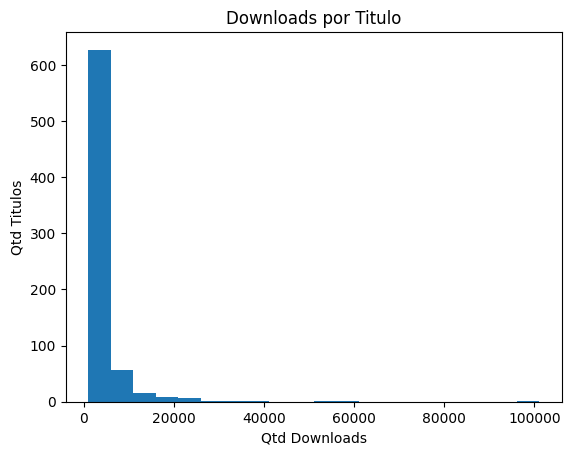

In [ ]:
#%% No gráfico abaixo, a frequência é representada pelos titulos dos livros,
#%% O que significa que há mais de 600 titulos da amostra com uma baixissima quantidade de downloads,
#%% Também percebe-se que há uma quantidade muito pequena de titulos com mais de 20 mil downloads
groupbyDF['download_count'].plot(kind='hist', bins=20, title='Downloads por Titulo')
plt.gca().set(xlabel='Qtd Downloads', ylabel='Qtd Titulos')

In [45]:
#%% Verificando quais são os autores com mais downloads
groupbyauthorsDF = booksDataDf.groupby(['authors'], as_index=False)['download_count'].sum()
groupbyauthorsDF.sort_values('download_count', ascending=False).head()

,authors,download_count
325,"Shelley, Mary Wollstonecraft",102131
320,"Shakespeare, William",98280
16,"Austen, Jane",82611
107,"Dickens, Charles",76149
408,unknown author,66640


In [46]:
#%% Curiosamente, nota-se que mais de 66 mil downloads são de livros que não possuem um autor definido
#%% Verificando quais são os autores com mais downloads
groupbyauthorsDF.sort_values('download_count', ascending=False).tail()

,authors,download_count
329,"Slavici, Ioan",1061
160,"Grant, Madison",1046
254,"Mitra, Dinabandhu",1043
84,"Comenius, Johann Amos",1042
213,"Lang, Allen Kim",1039


[Text(0.5, 0, 'Qtd Downloads'), Text(0, 0.5, 'Qtd Autores')]

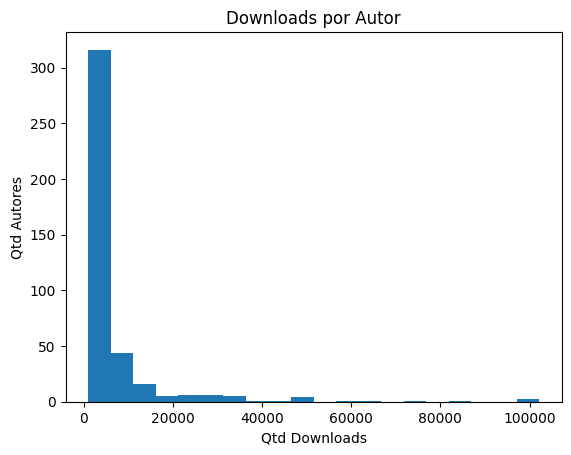

In [49]:
#%% No gráfico abaixo, a frequência é representada pelos autores dos livros,
#%% Percebe-se que há mais de 300 autores da amostra com uma baixissima quantidade de downloads,
#%% Há uma quantidade muito pequena de autores com mais de 40 mil downloads
groupbyauthorsDF['download_count'].plot(kind='hist', bins=20, title='Downloads por Autor')
plt.gca().set(xlabel='Qtd Downloads', ylabel='Qtd Autores')

# Conclusões
*   Atualmente o Gutendex conta com 72017 titulos;
*   Para a análise foi utiizada uma amostra de 736 titulos, cerca de 1% da do total;
*   Há 16 titulos repetidos na amostra;
*   As diferenças nesses titulos repetidos são a qual prateleira de livro ele pertence e os links disponiveis para seu download;
*   O livro mais baixado da amostra é Frankenstein;
*   O livro menos baixado da amostra é The railhead at Kysyl Khoto;
*   Há mais de 600 titulos da amostra com uma baixissima quantidade de downloads;
*   Há uma quantidade muito pequena de titulos com mais de 20 mil downloads;
*   A autora Mary Wollstonecraft Shelley é a que possui mais downloads na amostra devido ao grande sucesso de seu livro Frankenstein;
*   Mais de 66 mil downloads são de livros que não possuem um autor definido
*   Allen Kim Lang é o autor com menos downloads da amostra;
*   Há mais de 300 autores da amostra com uma baixissima quantidade de downloads;
*   Há uma quantidade muito pequena de autores com mais de 40 mil downloads.



